In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tse_en.csv')

In [3]:
df.head()

,Date,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
0,2008-12-06,بموتوح,ح . موتوژن‌,605,619,619,619,14,619.0,619.0,1,500,309500
1,2008-12-06,كاما,باما,2580,2657,2657,2605,25,2656.0,2657.0,14,21000,55793000
2,2008-12-06,شتوليح,ح . تولي‌پرس‌,1486,1500,1500,1500,14,1500.0,1500.0,1,733,1099500
3,2008-12-06,ثشاهد,سرمايه‌ گذاري‌ شاهد,2891,2977,2977,2910,19,2977.0,2977.0,34,130347,388043019
4,2008-12-06,لسرما,سرما آفرين‌,1698,1748,1748,1706,8,1748.0,1748.0,2,9514,16630472


In [4]:
khodro = df[df.Symbol == "خودرو"].dropna()
ring = df[df.Symbol == "خرينگ"].dropna()
bahman = df[df.Symbol == "خبهمن"].dropna()
mohareke = df[df.Symbol == "خمحركه"].dropna()

In [5]:
khodro.index = pd.to_datetime(khodro['Date'])
ring.index = pd.to_datetime(ring['Date'])
bahman.index = pd.to_datetime(bahman['Date'])
mohareke.index = pd.to_datetime(mohareke['Date'])

In [6]:
khodro.drop(columns="Date", inplace=True)
ring.drop(columns="Date", inplace=True)
bahman.drop(columns="Date", inplace=True)
mohareke.drop(columns="Date", inplace=True)

In [7]:
#Visualizing the Data

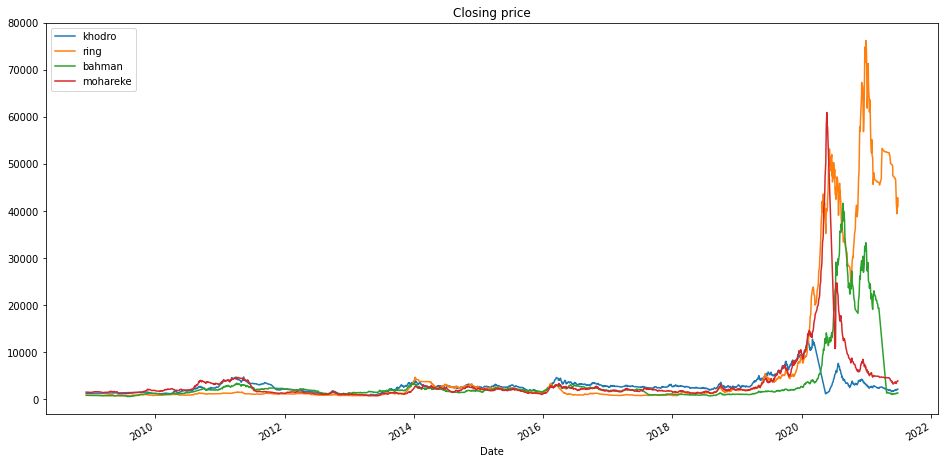

In [8]:
khodro['Close'].plot(label = 'khodro', figsize = (16,8), title = 'Closing price')
ring['Close'].plot(label = 'ring')
bahman['Close'].plot(label = 'bahman')
mohareke['Close'].plot(label='mohareke')
plt.legend()

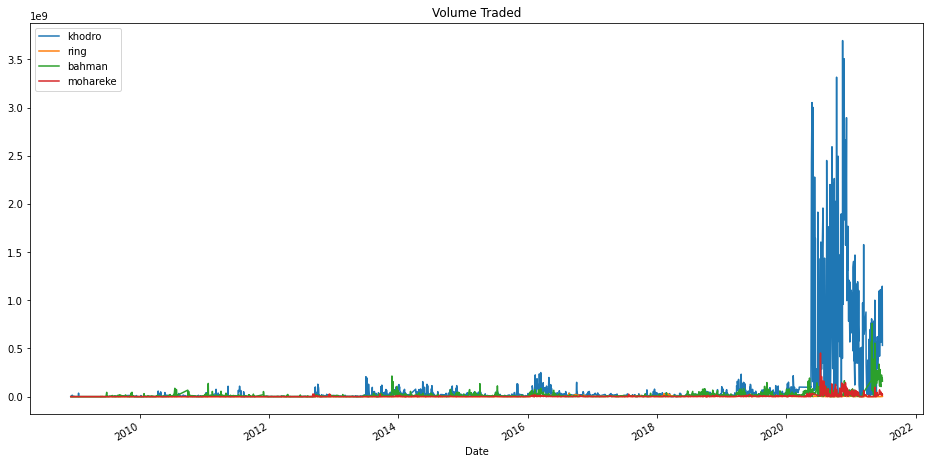

In [9]:
khodro['Volume'].plot(label = 'khodro', figsize = (16,8), title = 'Volume Traded')
ring['Volume'].plot(label = 'ring')
bahman['Volume'].plot(label = 'bahman')
mohareke['Volume'].plot(label='mohareke')
plt.legend()

In [10]:
#What happened?

In [11]:
mohareke['Volume'].idxmax()

Timestamp('2020-07-13 00:00:00')

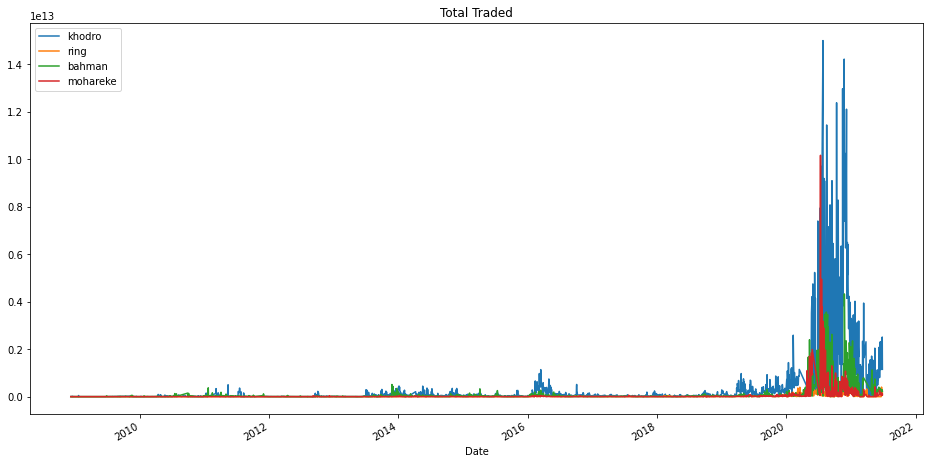

In [12]:
khodro['Value Traded'].plot(label = 'khodro', figsize = (16,8), title = 'Total Traded')
ring['Value Traded'].plot(label = 'ring')
bahman['Value Traded'].plot(label = 'bahman')
mohareke['Value Traded'].plot(label='mohareke')
plt.legend()

In [13]:
#What happened?
mohareke['Value Traded'].idxmax()

Timestamp('2020-07-13 00:00:00')

<AxesSubplot:xlabel='Date'>

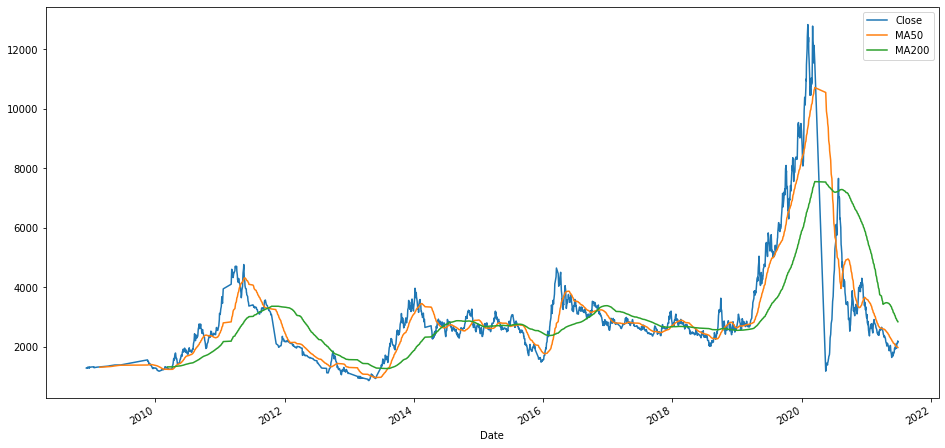

In [14]:
khodro['MA50'] = khodro['Close'].rolling(50).mean()
khodro['MA200'] = khodro['Close'].rolling(200).mean()
khodro[['Close', 'MA50', 'MA200']].plot(label = 'mohareke', figsize = (16,8))

<AxesSubplot:xlabel='Date'>

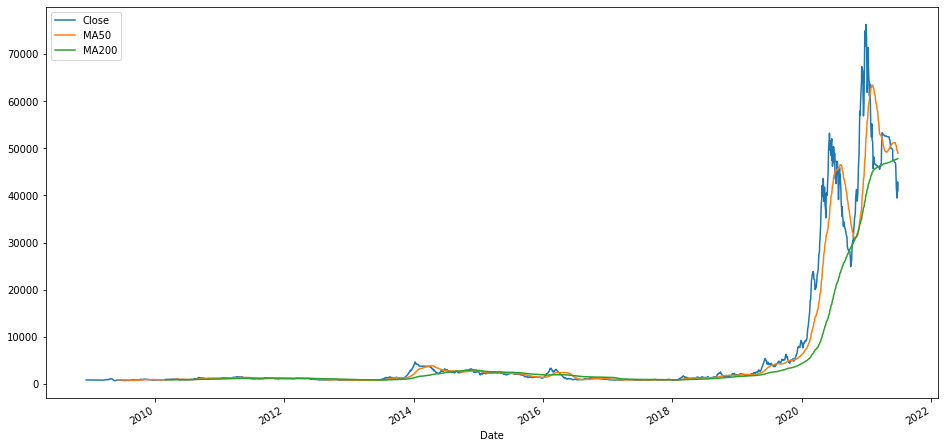

In [15]:
ring['MA50'] = ring['Close'].rolling(50).mean()
ring['MA200'] = ring['Close'].rolling(200).mean()
ring[['Close', 'MA50', 'MA200']].plot(label = 'mohareke', figsize = (16,8))

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
comp = pd.concat([khodro['Close'], ring['Close'], bahman['Close'], mohareke['Close']], axis = 1)

In [18]:
comp.columns = ['khodro Close', 'ring Close', 'bahman Close', 'mohareke Close']

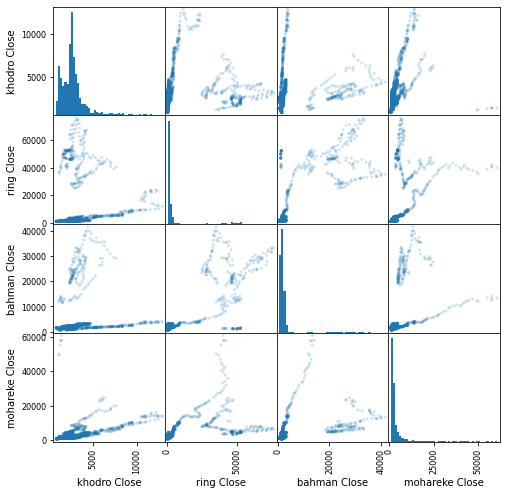

In [19]:
#Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. 
scatter_matrix(comp, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins':50});

In [20]:
#Basic Financial Analysis

In [21]:
#Daily Percentage Change

In [24]:
khodro['returns'] = khodro['Close'].pct_change(1)
ring['returns'] = ring['Close'].pct_change(1)
bahman['returns'] = bahman['Close'].pct_change(1)
mohareke['returns'] = mohareke['Close'].pct_change(1)

In [25]:
khodro.head()

,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded,MA50,MA200,returns
Date,,,,,,,,,,,,,,,
2008-12-06,خودرو,ايران‌ خودرو,1307,1308,1308,1278,-29,1270.0,1309.0,30,2222994,2831686027,NaN,NaN,NaN
2008-12-07,خودرو,ايران‌ خودرو,1278,1311,1311,1283,5,1311.0,1312.0,62,362811,475665221,NaN,NaN,0.003912
2008-12-08,خودرو,ايران‌ خودرو,1283,1310,1310,1287,4,1310.0,1311.0,77,417677,547160357,NaN,NaN,0.003118
2008-12-10,خودرو,ايران‌ خودرو,1287,1311,1311,1291,4,1311.0,1312.0,69,467419,612792375,NaN,NaN,0.003108
2008-12-13,خودرو,ايران‌ خودرو,1291,1310,1310,1295,4,1310.0,1311.0,83,511302,669806563,NaN,NaN,0.003098


In [26]:
ring.head()

,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded,MA50,MA200,returns
Date,,,,,,,,,,,,,,,
2008-12-07,خرينگ,رينگ‌سازي‌مشهد,871,845,845,871,0,845.0,845.0,1,1161,981045,NaN,NaN,NaN
2009-02-01,خرينگ,رينگ‌سازي‌مشهد,871,845,845,861,-10,845.0,845.0,7,31464,26587080,NaN,NaN,-0.011481
2009-02-09,خرينگ,رينگ‌سازي‌مشهد,861,836,836,860,-1,836.0,836.0,2,2000,1672000,NaN,NaN,-0.001161
2009-02-17,خرينگ,رينگ‌سازي‌مشهد,860,835,835,860,0,835.0,835.0,1,100,83500,NaN,NaN,0.000000
2009-03-08,خرينگ,رينگ‌سازي‌مشهد,860,835,835,835,-25,835.0,835.0,1,25,20875,NaN,NaN,-0.029070


<AxesSubplot:>

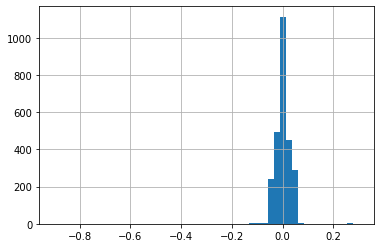

In [27]:
khodro['returns'].hist(bins=50)

<AxesSubplot:>

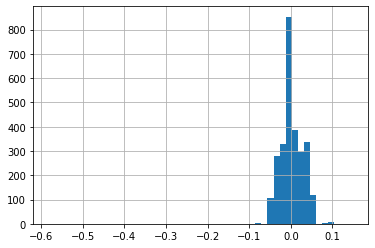

In [28]:
ring['returns'].hist(bins=50)

<AxesSubplot:>

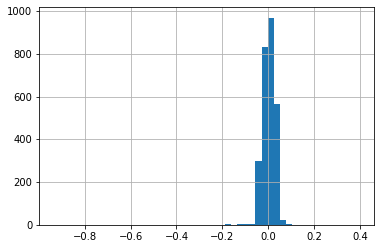

In [29]:
bahman['returns'].hist(bins=50)

<AxesSubplot:>

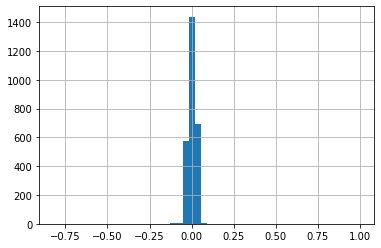

In [32]:
mohareke['returns'].hist(bins=50)

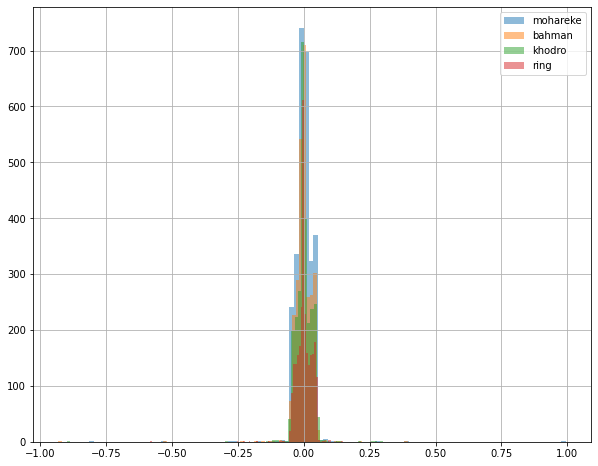

In [36]:
mohareke['returns'].hist(bins = 100, label = 'mohareke', figsize = (10, 8), alpha = 0.5)
bahman['returns'].hist(bins = 100, label = 'bahman', alpha = 0.5)
khodro['returns'].hist(bins = 100, label = 'khodro', alpha = 0.5)
ring['returns'].hist(bins = 100, label = 'ring', alpha = 0.5)
plt.legend()

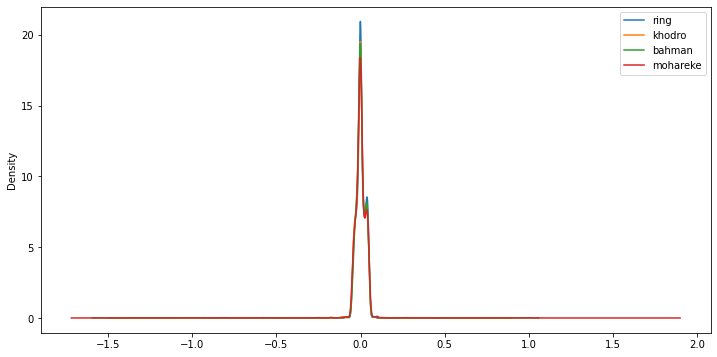

In [40]:
ring['returns'].plot(kind = 'kde', label = 'ring', figsize = (12, 6))
khodro['returns'].plot(kind = 'kde', label = 'khodro')
bahman['returns'].plot(kind = 'kde', label = 'bahman')
mohareke['returns'].plot(kind = 'kde', label = 'mohareke')
plt.legend()

<AxesSubplot:>

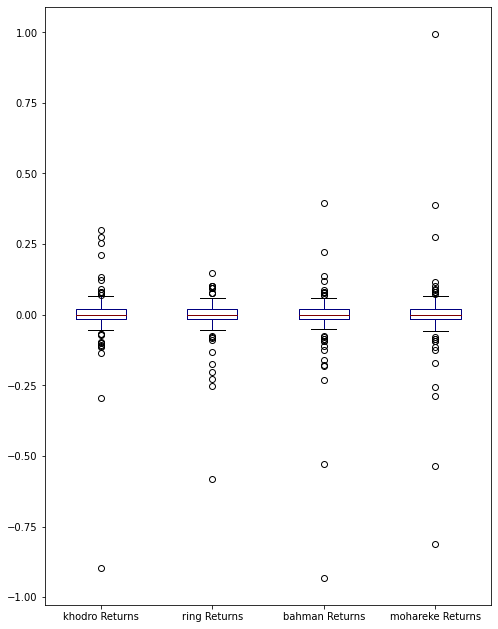

In [41]:
box_df = pd.concat([khodro['returns'], ring['returns'], bahman['returns'], mohareke['returns']], axis = 1)
box_df.columns = ['khodro Returns', 'ring Returns', 'bahman Returns', 'mohareke Returns']
box_df.plot(kind = 'box', figsize = (8, 11), colormap = 'jet')

In [42]:
#Comparing Daily Returns between Stocks

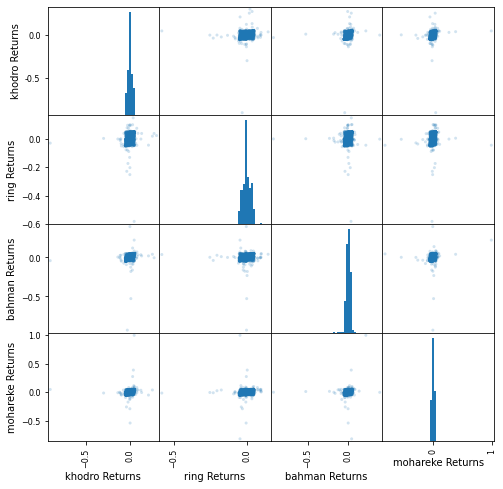

In [43]:
scatter_matrix(box_df, figsize = (8, 8), alpha = 0.2, hist_kwds = {'bins':50});

<AxesSubplot:xlabel='ring Returns', ylabel='bahman Returns'>

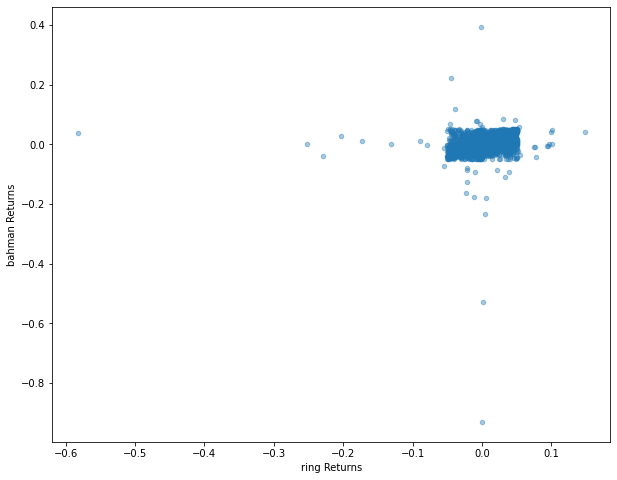

In [44]:
box_df.plot(kind = 'scatter', x = 'ring Returns', y = 'bahman Returns', alpha = 0.4, figsize = (10, 8))

In [45]:
#Cumulative Daily Returns

In [46]:
khodro['Cumulative Return'] = (1 + khodro['returns']).cumprod()
ring['Cumulative Return'] = (1 + ring['returns']).cumprod()
bahman['Cumulative Return'] = (1 + bahman['returns']).cumprod()
mohareke['Cumulative Return'] = (1 + mohareke['returns']).cumprod()

In [47]:
ring.head()

,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,,,,,,
2008-12-07,خرينگ,رينگ‌سازي‌مشهد,871,845,845,871,0,845.0,845.0,1,1161,981045,NaN,NaN,NaN,NaN
2009-02-01,خرينگ,رينگ‌سازي‌مشهد,871,845,845,861,-10,845.0,845.0,7,31464,26587080,NaN,NaN,-0.011481,0.988519
2009-02-09,خرينگ,رينگ‌سازي‌مشهد,861,836,836,860,-1,836.0,836.0,2,2000,1672000,NaN,NaN,-0.001161,0.987371
2009-02-17,خرينگ,رينگ‌سازي‌مشهد,860,835,835,860,0,835.0,835.0,1,100,83500,NaN,NaN,0.000000,0.987371
2009-03-08,خرينگ,رينگ‌سازي‌مشهد,860,835,835,835,-25,835.0,835.0,1,25,20875,NaN,NaN,-0.029070,0.958668


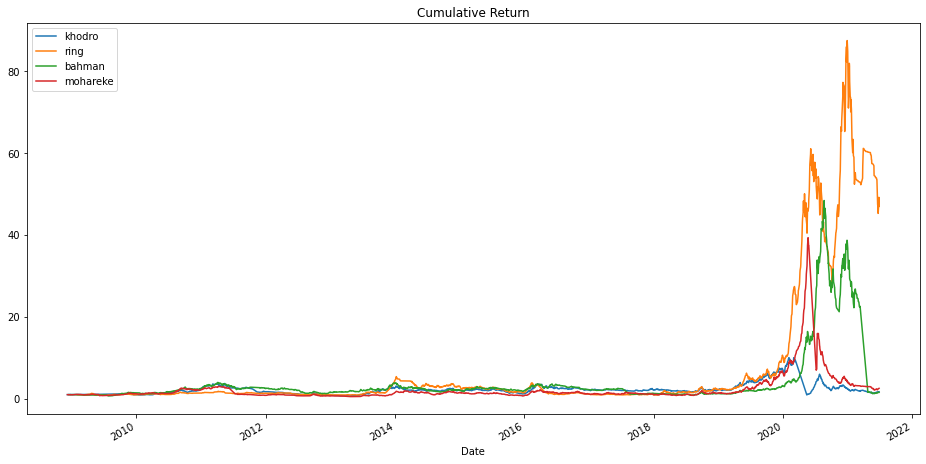

In [49]:
khodro['Cumulative Return'].plot(label = 'khodro', figsize = (16, 8), title = 'Cumulative Return')
ring['Cumulative Return'].plot(label = 'ring')
bahman['Cumulative Return'].plot(label = 'bahman')
mohareke['Cumulative Return'].plot(label = 'mohareke')
plt.legend()

In [50]:
#Using Statsmodels to get the trend
import statsmodels.api as sm

In [54]:
khodro_cycle, khodro_trend = sm.tsa.filters.hpfilter(khodro.Open)

In [53]:
khodro_cycle

Date
2008-12-06    -0.888288
2008-12-07     1.578769
2008-12-08     0.046380
2008-12-10     0.514115
2008-12-13    -1.018487
                ...    
2021-06-22    12.981317
2021-06-23    52.481966
2021-06-26    22.871564
2021-06-27   -17.807053
2021-06-28    63.474660
Name: Open_cycle, Length: 2612, dtype: float64

In [56]:
khodro["trend"] = khodro_trend

<AxesSubplot:xlabel='Date'>

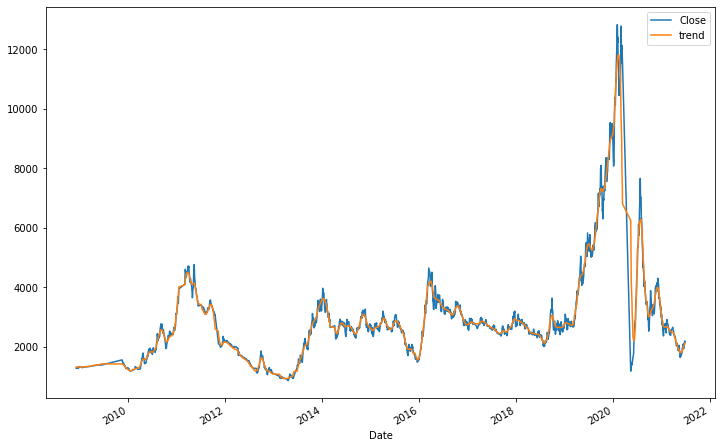

In [58]:
khodro[['Close', 'trend']].plot(figsize = (12, 8))

<AxesSubplot:xlabel='Date'>

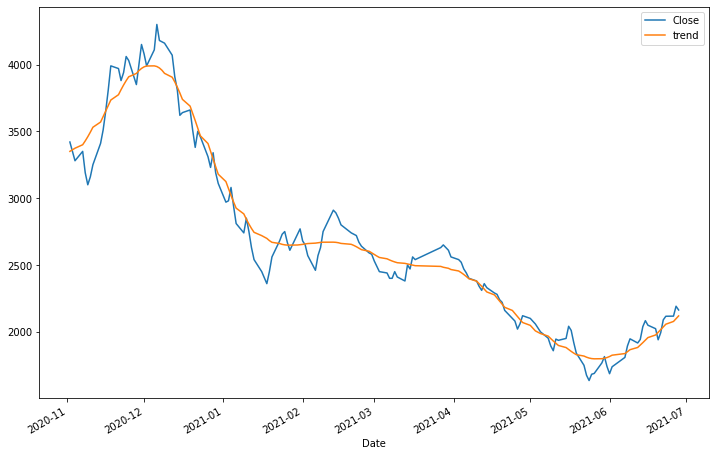

In [81]:
khodro[['Close', 'trend']]["2020-11":].plot(figsize = (12, 8))

In [82]:
#SMA
#Simple Moving Average

In [83]:
khodro['6-month-SMA'] = khodro['Close'].rolling(window = 6).mean()
khodro['12-month-SMA'] = khodro['Close'].rolling(window = 12).mean()

<AxesSubplot:xlabel='Date'>

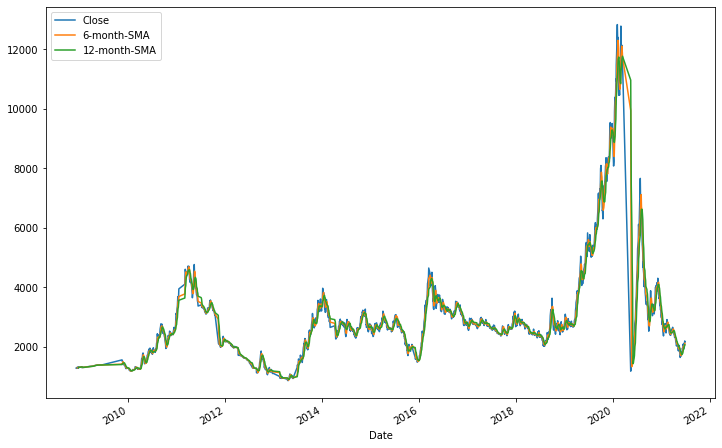

In [84]:
khodro[['Close', '6-month-SMA', '12-month-SMA']].plot(figsize = (12, 8))

<AxesSubplot:xlabel='Date'>

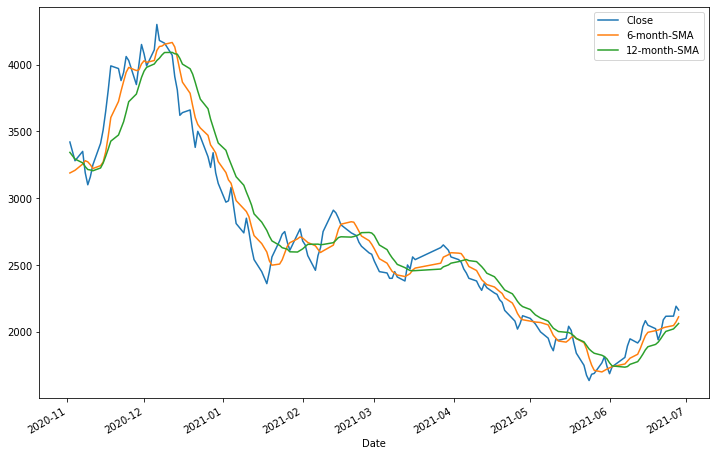

In [85]:
khodro[['Close', '6-month-SMA', '12-month-SMA']]["2020-11":].plot(figsize = (12, 8))

In [86]:
#EWMA
#Exponentially-weighted moving average

In [87]:
khodro['EWMA12'] = khodro['Close'].ewm(span=12).mean()

<AxesSubplot:xlabel='Date'>

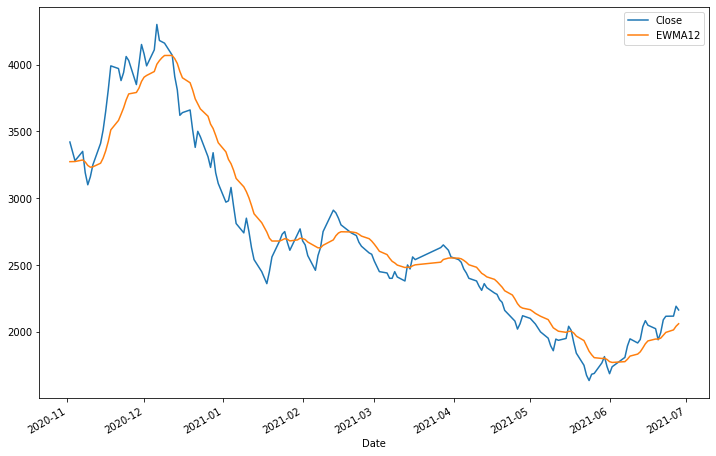

In [88]:
khodro[['Close','EWMA12']]["2020-11":].plot(figsize = (12, 8))

In [89]:
#ETS

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

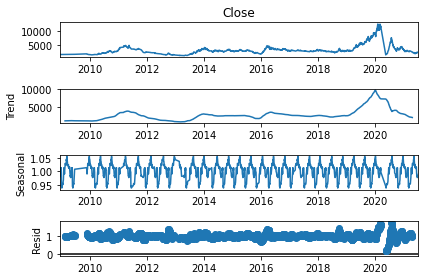

In [91]:
result = seasonal_decompose(khodro['Close'], model = 'multiplicative', period = 90)
fig = result.plot()

In [92]:
#Testing for Stationarity

In [93]:
from statsmodels.tsa.stattools import adfuller

In [94]:
result = adfuller(khodro['Close'])

In [95]:
result

(-3.2989730468154814,
 0.01492444178251836,
 28,
 2583,
 {'1%': -3.43288418914077,
  '5%': -2.8626596071159693,
  '10%': -2.567366007547488},
 35373.9071891137)

In [96]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('>>Augmented Dickey-Fuller Test<<')
    labels = ['ADF Test Statistic' ,'p-value' ,'#Lags Used' ,'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [120]:
adf_check(khodro['Close'])

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -3.2989730468154814
p-value : 0.01492444178251836
#Lags Used : 28
Number of Observations Used : 2583
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [121]:
#Differencing

In [122]:
khodro['Close Price First Difference'] = khodro['Close'] - khodro['Close'].shift(1)

In [123]:
adf_check(khodro['Close Price First Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -11.14421125576911
p-value : 3.054684099733331e-20
#Lags Used : 28
Number of Observations Used : 2582
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

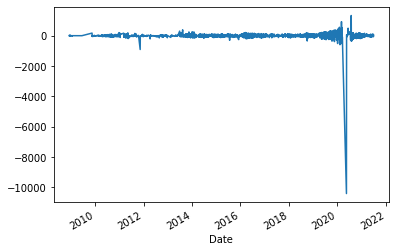

In [124]:
khodro['Close Price First Difference'].plot()

In [125]:
#Second Difference

In [126]:
khodro['Close Price Second Difference'] = khodro['Close Price First Difference'] - khodro['Close Price First Difference'].shift(1)

In [127]:
adf_check(khodro['Close Price Second Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -19.430587318012876
p-value : 0.0
#Lags Used : 23
Number of Observations Used : 2586
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

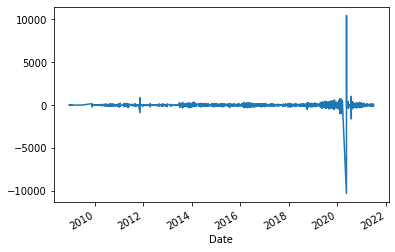

In [128]:
khodro['Close Price Second Difference'].plot()

In [129]:
#Seasonal Difference

<AxesSubplot:xlabel='Date'>

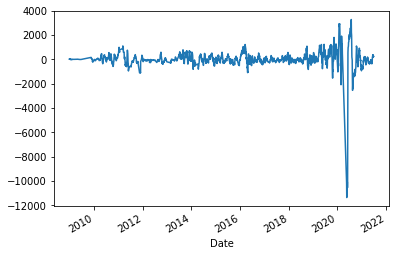

In [130]:
khodro['Seasonal Difference'] = khodro['Close'] - khodro['Close'].shift(12)
khodro['Seasonal Difference'].plot()

In [131]:
adf_check(khodro['Seasonal Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -12.219832616883624
p-value : 1.1138303416592546e-22
#Lags Used : 28
Number of Observations Used : 2571
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

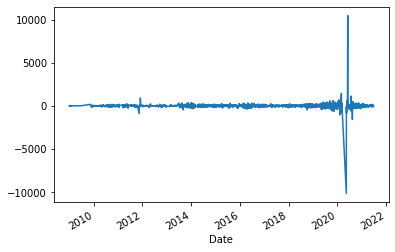

In [132]:
#seasonal first difference
khodro['Seasonal First Difference'] = khodro['Close Price First Difference'] - khodro['Close Price First Difference'].shift(12)
khodro['Seasonal First Difference'].plot()

In [133]:
adf_check(khodro['Seasonal First Difference'].dropna())

>>Augmented Dickey-Fuller Test<<
ADF Test Statistic : -11.85540529140036
p-value : 7.047351071926081e-22
#Lags Used : 27
Number of Observations Used : 2571
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [134]:
#Autocorrelation and Partial Autocorrelation Plots

In [135]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

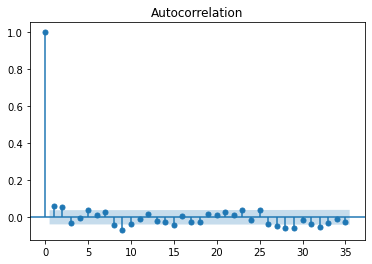

In [136]:
fig_first = plot_acf(khodro["Close Price First Difference"].dropna())

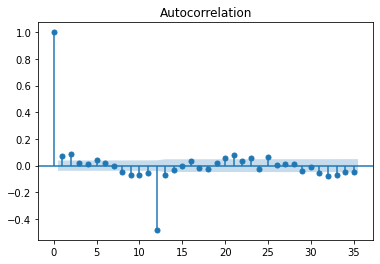

In [137]:
fig_seasonal_first = plot_acf(khodro["Seasonal First Difference"].dropna())

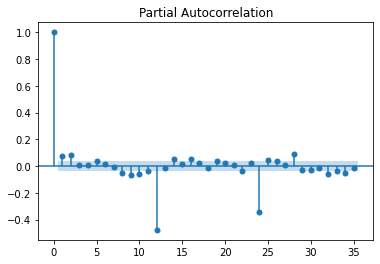

In [140]:
result = plot_pacf(khodro["Seasonal First Difference"].dropna())

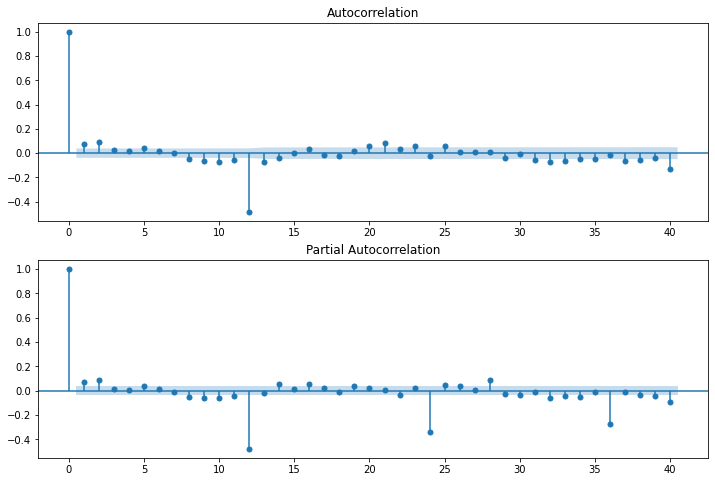

In [141]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(khodro['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(khodro['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [142]:
# ARIMA model

In [166]:
from statsmodels.tsa.arima_model import ARIMA

In [167]:
khodro = khodro[['High', 'Low', 'Open', 'Close']]

In [174]:
khodro_month = khodro.resample('M').mean()
khodro_month = khodro_month.dropna()

Dickey–Fuller test:
p = 0.098646


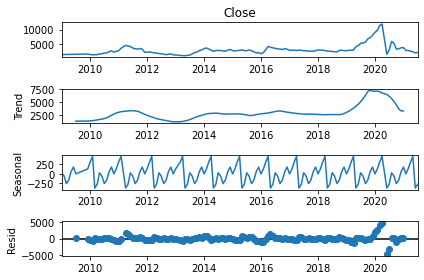

In [183]:
seasonal_decompose(khodro_month.Close, period=12).plot()
print("Dickey–Fuller test:\np = %f" % adfuller(khodro_month.Close)[1])
plt.show()

In [186]:
from scipy import stats
# Box-Cox Transformations
khodro_month['Close_box'], lmbda = stats.boxcox(khodro_month.Close)
print("Dickey–Fuller test: p = %f" % adfuller(khodro_month.Close_box)[1])

Dickey–Fuller test: p = 0.027512


In [188]:
# Seasonal differentiation (12 months)
khodro_month['box_diff_seasonal_12'] = khodro_month.Close_box - khodro_month.Close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(khodro_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.004790


In [189]:
# Seasonal differentiation (3 months)
khodro_month['box_diff_seasonal_3'] = khodro_month.Close_box - khodro_month.Close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(khodro_month.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.026176


Dickey–Fuller test: p = 0.000002


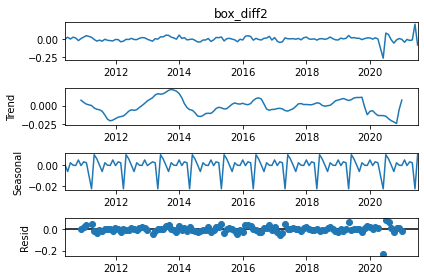

In [192]:
# Regular differentiation
khodro_month['box_diff2'] = khodro_month.box_diff_seasonal_12 - khodro_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(khodro_month.box_diff2[13:], period=12).plot()   
print("Dickey–Fuller test: p = %f" % adfuller(khodro_month.box_diff2[13:])[1])

plt.show()

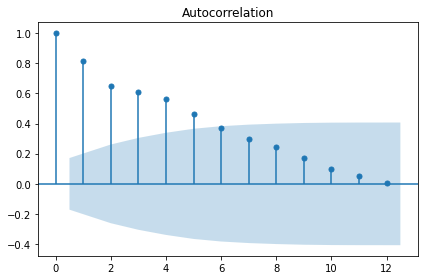

In [193]:
#autocorrelation_plot(btc_month.close)
plot_acf(khodro_month.Close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

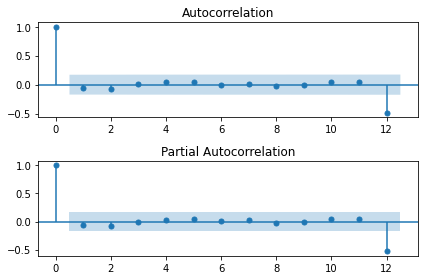

In [194]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(khodro_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_pacf(khodro_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

In [195]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(khodro_month.Close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [196]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
6     (2, 0) -627.614064
2     (0, 2) -626.596247
7     (2, 1) -625.741809
8     (2, 2) -625.505565
0     (0, 0) -624.680866


In [197]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Close_box   No. Observations:                  144
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 316.807
Date:                Mon, 26 Jul 2021   AIC                           -627.614
Time:                        02:09:26   BIC                           -618.726
Sample:                             0   HQIC                          -624.002
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0778      0.039     -1.999      0.046      -0.154      -0.002
ar.L2         -0.2104      0.073     -2.868      0.004      -0.354      -0.067
sigma2         0.0007   1.97e-05     35.385      0.0

In [198]:
print("Dickey–Fuller test:: p = %f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p = 0.000000


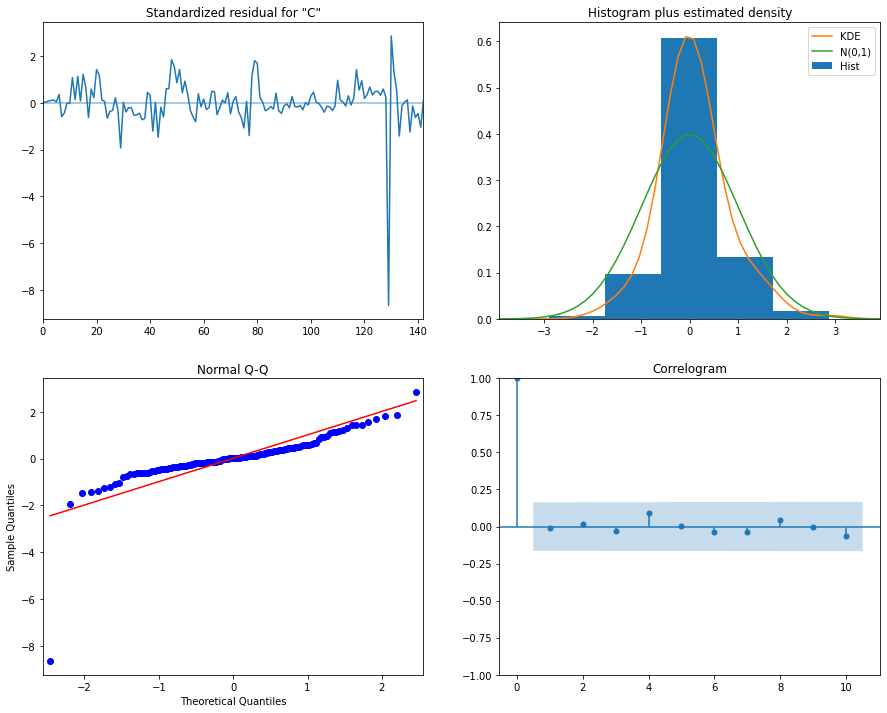

In [199]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [200]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

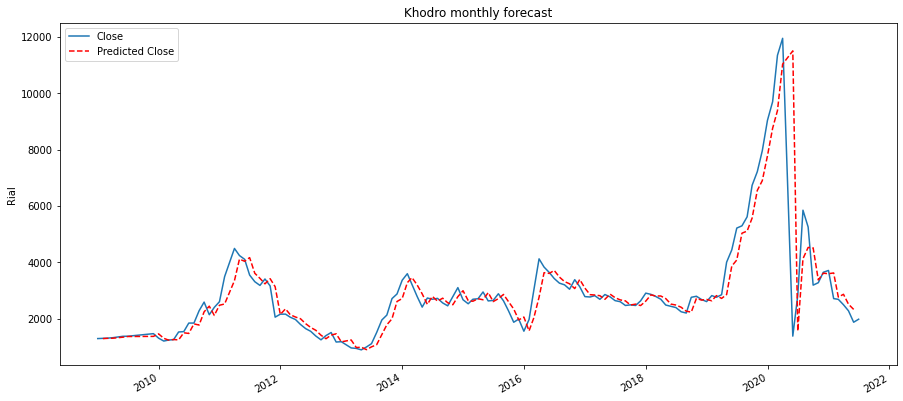

In [213]:
from datetime import datetime, timedelta

# Prediction
khodro_month_pred = khodro_month[['Close']]
date_list = [datetime(2021, 7, 31), datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30),
             datetime(2021, 12, 31), datetime(2022, 1, 31), datetime(2022, 2, 28), datetime(2022, 3, 31), datetime(2022, 4, 30),
             datetime(2022, 5, 31)]

future = pd.DataFrame(index=date_list, columns= khodro_month.columns)
khodro_month_pred = pd.concat([khodro_month_pred, future])

#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
khodro_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2009, 1, 31), end=datetime(2021, 5, 31)), lmbda)


plt.figure(figsize=(15,7))
khodro_month_pred.Close.plot()
khodro_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Khodro monthly forecast')
plt.ylabel('Rial')
plt.show()

In [214]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(khodro_month.Close_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 4)).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [215]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
37  (2, 0, 0, 1) -599.053723
1   (0, 0, 0, 1) -598.736983
13  (0, 2, 0, 1) -598.610746
39  (2, 0, 1, 1) -597.427698
15  (0, 2, 1, 1) -597.397922
                                      SARIMAX Results                                      
Dep. Variable:                           Close_box   No. Observations:                  144
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 4)   Log Likelihood                 303.527
Date:                             Mon, 26 Jul 2021   AIC                           -599.054
Time:                                     02:19:01   BIC                           -587.316
Sample:                                          0   HQIC                          -594.284
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

In [216]:
print("Dickey–Fuller test:: p = %f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p = 0.000000


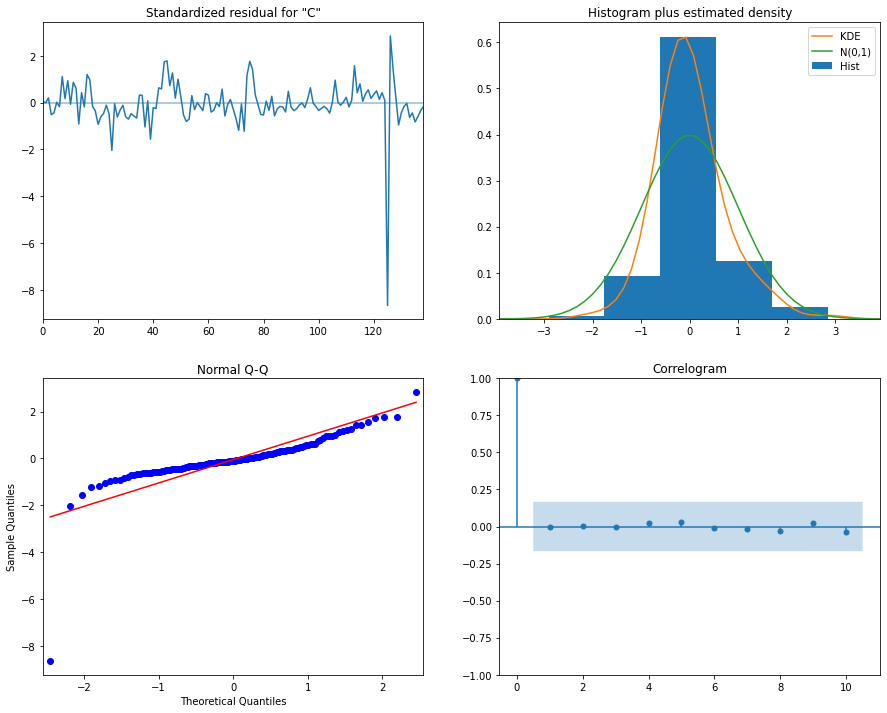

In [217]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.000000


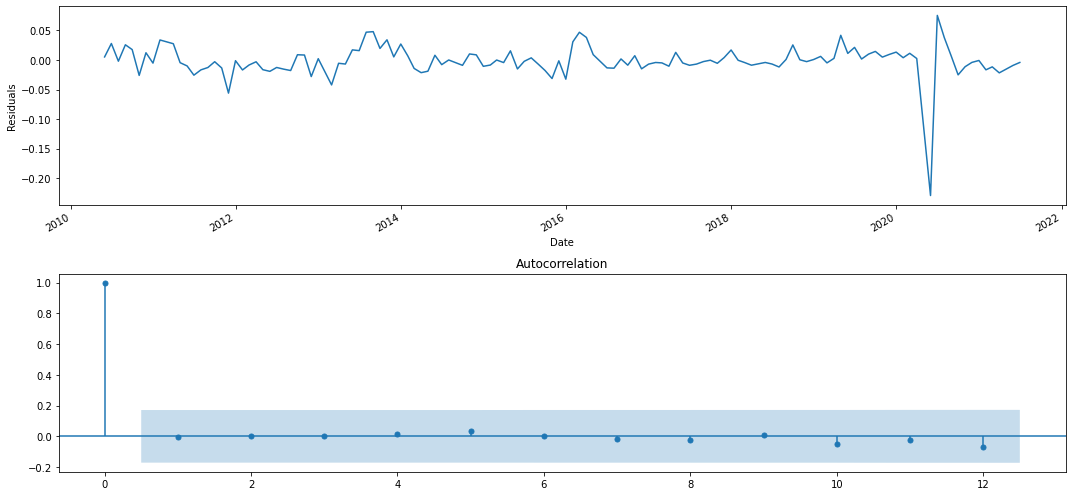

In [218]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
#sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

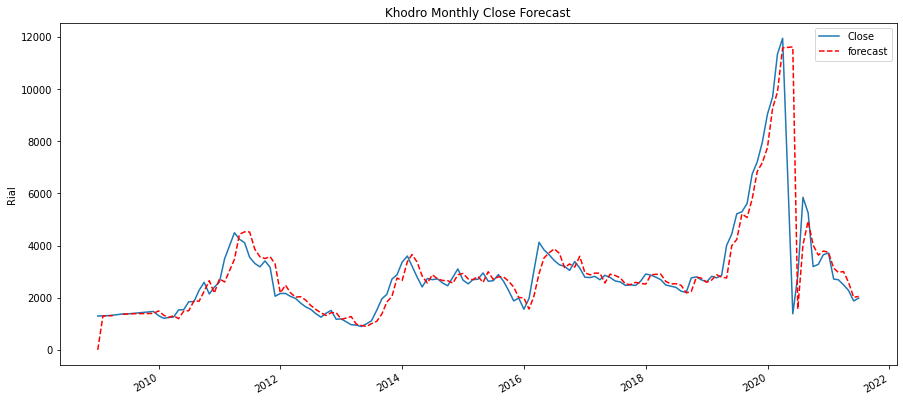

In [231]:
# Prediction
khodro_month2 = khodro_month[['Close']]
date_list = [datetime(2021, 7, 31), datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31),
             datetime(2022, 1, 31), datetime(2022, 2, 28), datetime(2022, 3, 31), datetime(2022, 4, 30), datetime(2022, 5, 31),]
future = pd.DataFrame(index=date_list, columns= khodro_month.columns)
khodro_month2 = pd.concat([khodro_month2, future])

khodro_month2['forecast'] = invboxcox(best_model.predict(start=0, end=143), lmbda)

plt.figure(figsize=(15,7))
khodro_month2.Close.plot()
khodro_month2.forecast.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.title('Khodro Monthly Close Forecast')
plt.ylabel('Rial')
#plt.savefig('khodro_monthly_forecast.png')
plt.show()